<a href="https://colab.research.google.com/github/mohdumarharis/Cheminformatics/blob/main/dissertation_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Another Approach

In [ ]:
import pandas as pd

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
smiles_cancer=pd.read_csv('smiles_cancer.csv')

In [ ]:
mol_desc=pd.read_csv('mol_desc.csv')

In [ ]:
mol_desc

,MW,LogP,NumHDonors,NumHAcceptors
0,335.464,3.0640,1.0,4.0
1,436.592,6.2389,0.0,4.0
2,103.081,-0.3217,1.0,3.0
3,200.266,3.2914,1.0,2.0
4,285.169,-5.3635,4.0,8.0
...,...,...,...,...
26386,798.244,10.1179,6.0,8.0
26387,146.190,-0.6168,3.0,3.0
26388,1158.152,4.9552,5.0,23.0
26389,1354.635,6.9484,16.0,22.0


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(mol_desc, *['MW'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(mol_desc, *['LogP'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(mol_desc, *['NumHDonors'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(mol_desc, *['NumHAcceptors'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(mol_desc, *['MW'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(mol_desc, *['LogP'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(mol_desc, *['NumHDonors'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(mol_desc, *['NumHAcceptors'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(mol_desc, *[[['MW', 'LogP'], ['LogP', 'NumHDonors'], ['NumHDonors', 'NumHAcceptors']]], **{})
chart

In [ ]:

mol_desc.mean(axis=0)

MW               467.997577
LogP               1.356742
NumHDonors         4.021144
NumHAcceptors      8.201584
anticancer         0.047099
dtype: float64

In [ ]:
mol_desc['anticancer']=smiles_cancer["Anticancer"]

In [ ]:
#molecule_fingerprints=pd.read_csv('descriptors_output.csv')

In [ ]:
#molecule_fingerprints['anticancer']=smiles_cancer["Anticancer"]

In [ ]:
# molecule_fingerprints['MW']=mol_desc['MW']
# molecule_fingerprints['LogP']=mol_desc['LogP']
# molecule_fingerprints['NumHDonors']=mol_desc['NumHDonors']
# molecule_fingerprints['NumHAcceptors']=mol_desc['NumHAcceptors']
# molecule_fingerprints['anticancer']=mol_desc['anticancer']


In [ ]:
x=mol_desc.drop(columns=['anticancer'])

In [ ]:
y=mol_desc['anticancer']

In [ ]:
data = pd.concat([x, y], axis=1)
data.dropna(inplace=True)
x = data.drop(columns=['anticancer'])
y = data['anticancer']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Define the deep learning model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model using the resampled data
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
528/528 [==============================] - 3s 3ms/step - loss: 1.5602 - accuracy: 0.9198 - val_loss: 0.2767 - val_accuracy: 0.9538
Epoch 2/10
528/528 [==============================] - 1s 3ms/step - loss: 0.3121 - accuracy: 0.9491 - val_loss: 0.2520 - val_accuracy: 0.9538
Epoch 3/10
528/528 [==============================] - 1s 3ms/step - loss: 0.2588 - accuracy: 0.9519 - val_loss: 0.2291 - val_accuracy: 0.9538
Epoch 4/10
528/528 [==============================] - 1s 3ms/step - loss: 0.2438 - accuracy: 0.9523 - val_loss: 0.2175 - val_accuracy: 0.9538
Epoch 5/10
528/528 [==============================] - 1s 2ms/step - loss: 0.2273 - accuracy: 0.9525 - val_loss: 0.2070 - val_accuracy: 0.9538
Epoch 6/10
528/528 [==============================] - 1s 3ms/step - loss: 0.2166 - accuracy: 0.9528 - val_loss: 0.2081 - val_accuracy: 0.9538
Epoch 7/10
528/528 [==============================] - 1s 3ms/step - loss: 0.2062 - accuracy: 0.9529 - val_loss: 0.2020 - val_accuracy: 0.9538
Epoch 

In [ ]:
# Evaluate the model on the original test data
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print('Test accuracy:', test_acc)

165/165 [==============================] - 0s 2ms/step - loss: 0.1941 - accuracy: 0.9521
Test accuracy: 0.9520742297172546


In [ ]:
# Make predictions
predictions = model.predict(X_test)

165/165 [==============================] - 0s 1ms/step


In [ ]:
# Convert predictions to binary classes (0 or 1)
predicted_classes = np.round(predictions)

In [ ]:
# Assess performance metrics (e.g., accuracy, precision, recall, F1-score)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, predicted_classes)
precision = precision_score(y_test, predicted_classes)
recall = recall_score(y_test, predicted_classes)
f1 = f1_score(y_test, predicted_classes)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1)

Accuracy: 0.9520742564879712
Precision: 0.0
Recall: 0.0
F1-Score: 0.0


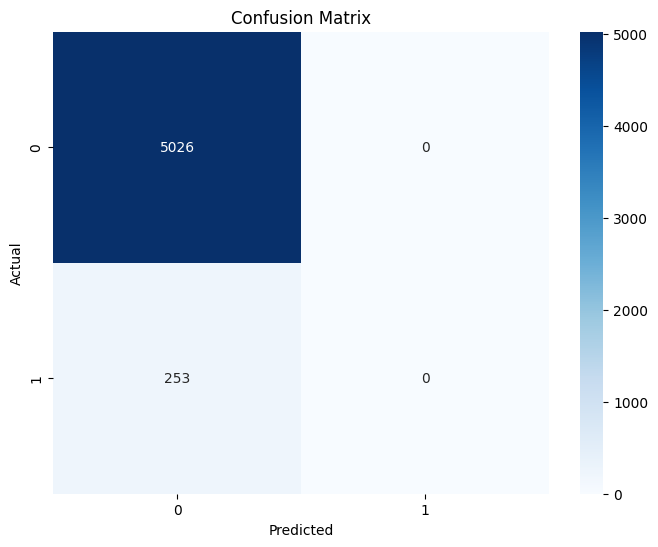

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for model 11')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()